In [29]:
import pandas as pd
import numpy as np

In [30]:
pd.set_option('float_format', '{:,.2f}'.format)

In [31]:
# getting data from csv file to pandas
df = pd.read_csv('petropolis_gastos_2021.csv',
                 sep=';',
                 encoding='iso8859_2',
                 names=['drop','orgao','empenho','data_emissao','favorecido','descricao','empenhado_liquido_brl','anulado_brl','liquido_brl','pago_brl'],
                 parse_dates=['data_emissao'],
                 dayfirst=True
                )

In [32]:
# dropping dummy column
df = df.drop(columns='drop')
# getting rid of currency simbol and thousand separator
df[df.columns[5:]] = df[df.columns[5:]].replace('[R$.]', '', regex=True)
# turning comma into period for american number format
df[df.columns[5:]] = df[df.columns[5:]].replace('[,]', '.', regex=True).astype(float)
# adding month and year for later grouping purposes
df['ano_emissao'] = df['data_emissao'].dt.year
df['trimestre_emissao'] = df['data_emissao'].dt.quarter
df['mes_emissao'] = df['data_emissao'].dt.month

In [33]:
# checking data types
df.dtypes

orgao                            object
empenho                          object
data_emissao             datetime64[ns]
favorecido                       object
descricao                        object
empenhado_liquido_brl           float64
anulado_brl                     float64
liquido_brl                     float64
pago_brl                        float64
ano_emissao                       int64
trimestre_emissao                 int64
mes_emissao                       int64
dtype: object

In [34]:
df.head()

,orgao,empenho,data_emissao,favorecido,descricao,empenhado_liquido_brl,anulado_brl,liquido_brl,pago_brl,ano_emissao,trimestre_emissao,mes_emissao
0,Prefeitura Municipal,2140,2021-08-20,RODRIGO FIRMINO DE SANTANA,Contrataçăo do artista plástico Rodrigo CBpara...,"2,500.00",0.00,0.00,0.00,2021,3,8
1,Prefeitura Municipal,2138,2021-08-19,ANILHAS PARA PÁSSAROS E AVES CAPRI INDÚSTRIA E...,AQUISIÇĂO DE KIT DE MICROCHIP PARA IDENTIFICAÇ...,"5,325.00",0.00,0.00,0.00,2021,3,8
2,Fundo Municipal de Saúde,2276,2021-08-19,J RIBEIRO ATACADISTA DE PEÇAS E ACESSÓRIOS AUT...,AQUISIÇĂO DE MATERIAL DE CONSUMO MEDICO HOSPIT...,"3,396.40",0.00,0.00,0.00,2021,3,8
3,Fundo Municipal de Saúde,2277,2021-08-19,J RIBEIRO ATACADISTA DE PEÇAS E ACESSÓRIOS AUT...,AQUISIÇĂO DE MATERIAL DE CONSUMO MEDICO HOSPIT...,"3,396.40",0.00,0.00,0.00,2021,3,8
4,Fundo Municipal de Saúde,2278,2021-08-19,STERI GRAU PRODUTOS HOSPITALARES EIRELI,AQUISIÇĂO DE TESTE BIOLÓGICO E INEGRADOR QUÍMI...,712.00,0.00,712.00,0.00,2021,3,8


In [35]:
df.describe()

,empenhado_liquido_brl,anulado_brl,liquido_brl,pago_brl,ano_emissao,trimestre_emissao,mes_emissao
count,"3,062.00","3,062.00","3,062.00","3,062.00","3,062.00","3,062.00","3,062.00"
mean,"178,432.59","2,985.16","51,694.53","17,589.64","2,021.00",1.55,3.45
std,"1,871,163.39","65,007.51","701,214.01","248,546.65",0.00,0.65,2.13
min,0.04,0.00,0.00,0.00,"2,021.00",1.00,1.00
25%,"1,155.00",0.00,0.00,0.00,"2,021.00",1.00,1.00
50%,"4,916.24",0.00,310.20,0.00,"2,021.00",1.00,3.00
75%,"24,343.47",0.00,"6,000.00",0.00,"2,021.00",2.00,5.00
max,"70,000,000.00","3,179,428.86","32,977,434.95","10,093,019.29","2,021.00",3.00,8.00


In [36]:
df.loc[df['empenhado_liquido_brl'] >= 70000000]

,orgao,empenho,data_emissao,favorecido,descricao,empenhado_liquido_brl,anulado_brl,liquido_brl,pago_brl,ano_emissao,trimestre_emissao,mes_emissao
2458,Prefeitura Municipal,"80<form id=""form_80"" action='../grid_subempenh...",2021-01-25,FOLHA DE PAGAMENTO,Pagamento da folha de pagamento dos servidores...,"70,000,000.00",0.00,"32,977,434.95","10,093,019.29",2021,1,1


In [41]:
df.groupby(['trimestre_emissao','mes_emissao'])['empenhado_liquido_brl'].sum()

trimestre_emissao  mes_emissao
1                  1             359,896,520.12
                   2              33,763,312.28
                   3              36,262,507.78
2                  4              19,689,506.87
                   5              31,560,954.40
                   6              43,687,320.60
3                  7              13,747,764.82
                   8               7,752,709.68
Name: empenhado_liquido_brl, dtype: float64

In [24]:
df.groupby('mes_emissao')['empenhado_liquido_brl'].nunique()

mes_emissao
1    671
2    439
3    204
4    221
5    308
6    275
7    115
8    114
Name: empenhado_liquido_brl, dtype: int64

In [40]:
df.groupby('mes_emissao')['empenhado_liquido_brl'].mean()

mes_emissao
1   443,768.83
2    64,680.67
3   120,473.45
4    55,152.68
5    76,790.64
6   108,674.93
7    98,198.32
8    65,700.93
Name: empenhado_liquido_brl, dtype: float64

In [26]:
total_gastos = df['empenhado_liquido_brl'].sum()
print('{:,.2f}'.format(total_gastos))

546,360,596.55


In [27]:
media_gastos = df['empenhado_liquido_brl'].mean()
print('{:,.2f}'.format(media_gastos))

178,432.59


In [45]:
print(df['data_emissao'].min())
print(df['data_emissao'].max())

2021-01-01 00:00:00
2021-08-20 00:00:00


#### Gráficos

In [ ]:
import matplotlib as plt

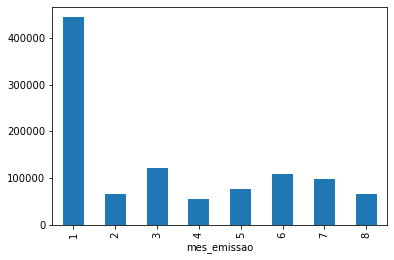

In [50]:
df.groupby('mes_emissao')['empenhado_liquido_brl'].mean().plot.bar();

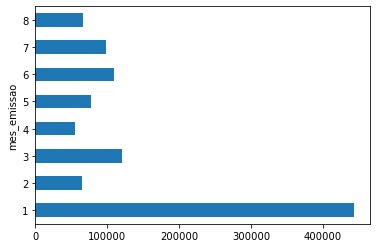

In [49]:
df.groupby('mes_emissao')['empenhado_liquido_brl'].mean().plot.barh();

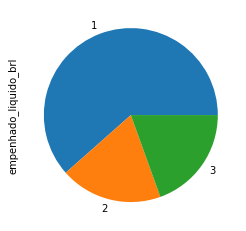

In [51]:
df.groupby('trimestre_emissao')['empenhado_liquido_brl'].mean().plot.pie('gastos por trimestre')
plt.xlabel('')
plt.ylabel();